<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/Taller_2_Introducci%C3%B3n_a_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

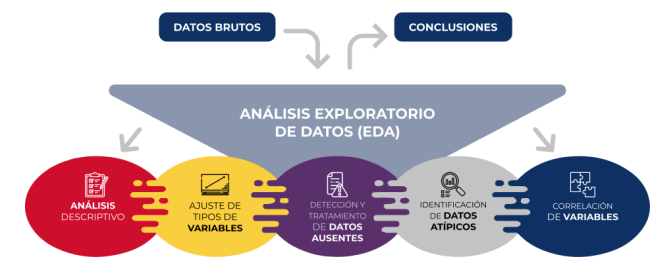

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [1]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic.csv')

Cómo podemos llenar los datos nulos?

Los datos disponibles son suficientes para generar un modelo mínimo viable?

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

In [2]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [5]:
df.isnull().count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,891
SibSp,891
Parch,891
Ticket,891
Fare,891


In [6]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [7]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

,Total,Porcentaje
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [8]:
def plot_learning_curve(estimator,title,X,y, ylim=None,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt


Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?

# Nueva *sección*

In [9]:
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)


pasamos el typo de dato de la edad de flotante a entero


In [11]:
print(df.describe(include='all'))


        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   891.000000  891.000000 

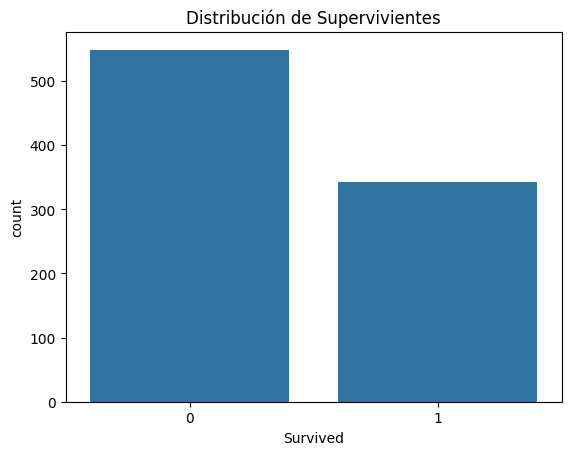

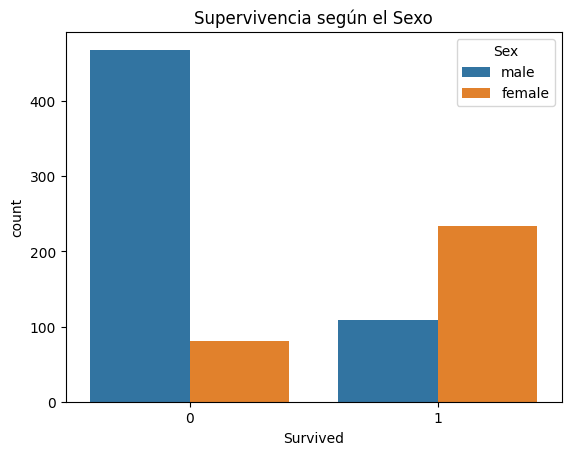

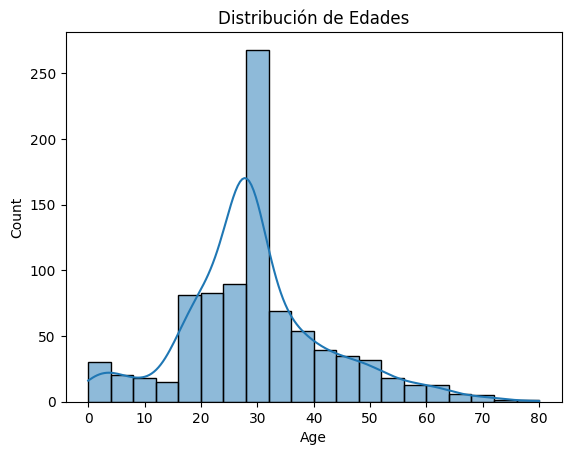

In [12]:
# Distribución de sobrevivientes
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Supervivientes')
plt.show()

# Supervivencia según el sexo
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Supervivencia según el Sexo')
plt.show()

# Histograma de edades
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribución de Edades')
plt.show()


El gráfico muestra una clara diferencia entre hombres y mujeres. Mientras que más del 70% de las mujeres sobrevivieron, solo alrededor del 20% de los hombres lo hicieron. Esto sugiere que hubo una política de evacuación basada en “mujeres y niños primero”.

Los pasajeros jóvenes, especialmente menores de 10 años, muestran tasas de supervivencia más altas. La mayoría de los sobrevivientes tenían entre 20 y 40 años, lo que sugiere que la edad tuvo un rol importante en la supervivencia.

In [13]:
# Rellenar 'Embarked' con el valor más frecuente
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar todas las filas con valores nulos
df = df.dropna()


In [14]:
total=df.isnull().sum().sort_values(ascending=False)
total

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Se limpian los nulos por su gran porsentaje de existencia y los datos que poseen una menor cantidad los rellenamos un los datos de mallor frecuencia


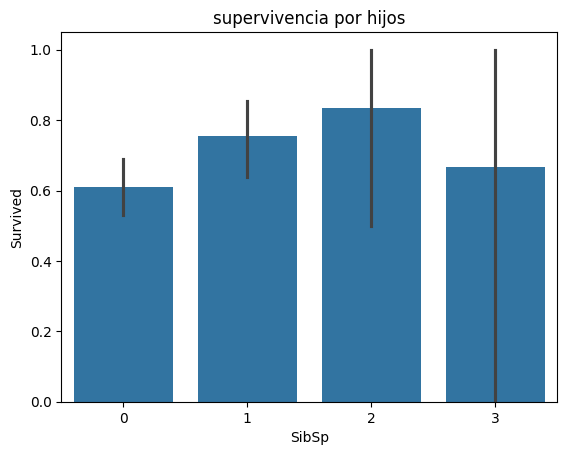

In [15]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('supervivencia por hijos')
plt.show()

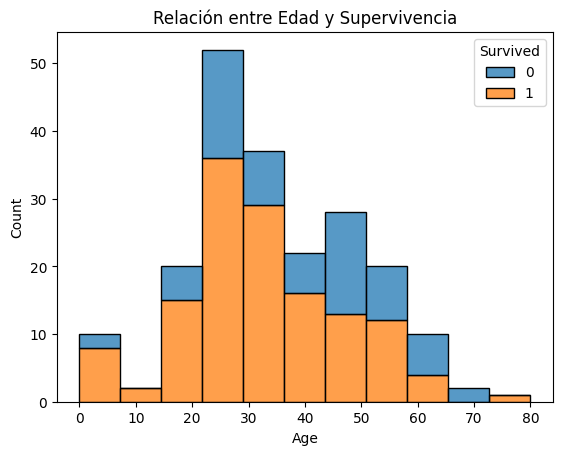

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.110153 -0.082977  0.040242 -0.079741 -0.063456   
Survived        0.110153  1.000000 -0.033032 -0.219387  0.132599  0.038081   
Pclass         -0.082977 -0.033032  1.000000 -0.288561 -0.084097  0.058366   
Age             0.040242 -0.219387 -0.288561  1.000000 -0.141488 -0.245127   
SibSp          -0.079741  0.132599 -0.084097 -0.141488  1.000000  0.265411   
Parch          -0.063456  0.038081  0.058366 -0.245127  0.265411  1.000000   
Fare            0.017243  0.128306 -0.311713 -0.071615  0.290696  0.383972   

                 Fare  
PassengerId  0.017243  
Survived     0.128306  
Pclass      -0.311713  
Age         -0.071615  
SibSp        0.290696  
Parch        0.383972  
Fare         1.000000  


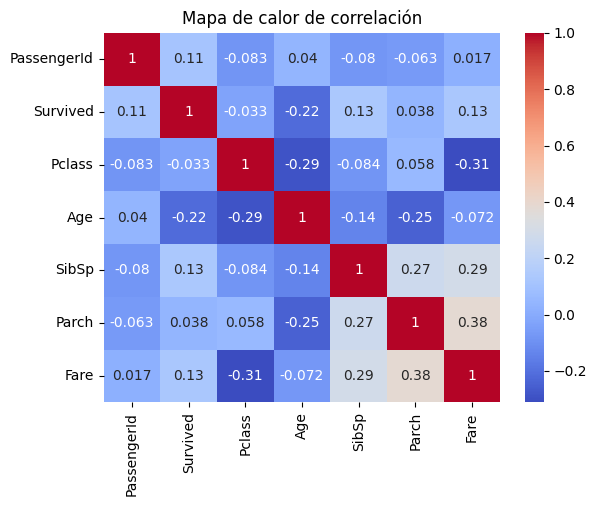

In [16]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Relación entre Edad y Supervivencia')
plt.show()

# Correlación numérica
print(df.corr(numeric_only=True))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


Cada celda contiene un valor de correlación entre dos variables:

+1: correlación positiva perfecta.

-1: correlación negativa perfecta.

0: no hay correlación.

Los colores indican la intensidad y dirección de la correlación:

Rojo intenso = correlación positiva fuerte.

Azul intenso = correlación negativa fuerte.

Tonos claros = correlación débil o inexistente.

📊 Análisis de algunas correlaciones clave:
1. Survived
Con Age: -0.22 → ligera correlación negativa. A mayor edad, menor probabilidad de supervivencia.

Con SibSp: 0.13 → leve correlación positiva. Tener hermanos o pareja a bordo se relaciona ligeramente con mayor probabilidad de sobrevivir.

Con Pclass: -0.033 → muy débil, pero indica que las clases altas tuvieron un poco más de probabilidad de sobrevivir.

2. Pclass
Con Fare: -0.31 → correlación negativa. Las personas con boletos más caros (mayor Fare) viajaban en clases más altas (clase 1 = valor bajo).

Con Age: -0.29 → personas mayores tendían a viajar en clases más altas, pero la relación es moderada.

3. Parch y Fare
0.38 de correlación → las personas que viajaban con padres o hijos tendían a pagar más por su boleto, tal vez por comprar en grupo o buscar más comodidad.

## Explicación detallada de la función `plot_learning_curve`

### 📄 Descripción general
La función `plot_learning_curve` genera una **curva de aprendizaje** para un modelo de machine learning. Esta curva permite visualizar cómo cambia el rendimiento del modelo a medida que se incrementa la cantidad de datos de entrenamiento, ayudando a diagnosticar problemas como *overfitting* (sobreajuste) o *underfitting* (subajuste).

---

### 🔹 Línea por línea
```python
def plot_learning_curve(estimator, title, X, y, ylim=None, xlim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
```
- **estimator**: el modelo que se desea entrenar (ej. `SVC()`, `RandomForestClassifier()`).
- **title**: título que aparecerá en la gráfica.
- **X**: datos de entrada (features).
- **y**: etiquetas (targets).
- **ylim**: límites para el eje Y (opcional).
- **xlim**: límites para el eje X (opcional).
- **cv**: número de particiones para validación cruzada.
- **n_jobs**: número de procesadores para paralelizar el cálculo.
- **train_sizes**: proporciones del conjunto de entrenamiento usadas (de 10% a 100%).

```python
    plt.figure()
    plt.title(title)
```
- Crea una figura nueva y le asigna un título.

```python
    if ylim is not None:
        plt.ylim(*ylim)
```
- Si se proporcionaron límites para el eje Y, se establecen.

```python
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
```
- Define etiquetas para los ejes X e Y.

```python
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
```
- Usa `learning_curve` de Scikit-Learn para obtener:
  - Tamaños de datos usados.
  - Puntuaciones de entrenamiento.
  - Puntuaciones de validación.

```python
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
```
- Calcula la media y desviación estándar para cada tamaño de conjunto.

```python
    plt.grid()
```
- Agrega una rejilla a la gráfica.

```python
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
```
- Rellena el área de error (desviación estándar) para la curva de entrenamiento.

```python
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
```
- Rellena el área de error para la curva de validación.

```python
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")
```
- Dibuja las curvas de entrenamiento (roja) y validación (verde).

```python
    plt.legend(loc="best")
    return plt
```
- Muestra la leyenda y retorna el objeto `plt` para visualizar o guardar.








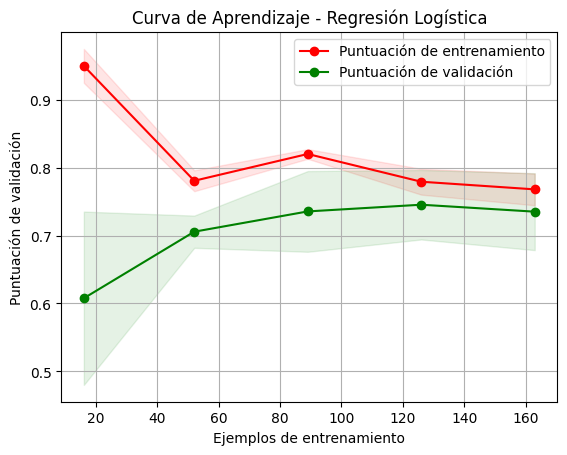

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Cargar dataset
df = pd.read_csv('titanic.csv')

# Limpieza básica (puedes expandir esta según tu análisis anterior)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(int)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.dropna(inplace=True)

# Convertir variables categóricas a numéricas
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Variables independientes y dependiente
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Definir modelo
model = LogisticRegression(max_iter=1000)

# Definir la función (si no la has cargado ya)
def plot_learning_curve(estimator,title,X,y, ylim=None,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt

# Ejecutar la función
plot_learning_curve(model, "Curva de Aprendizaje - Regresión Logística", X, y, cv=5)
plt.show()


### 📈 Interpretación de la gráfica generada
La gráfica contiene:
- **Curva roja**: puntuación de entrenamiento (precisión del modelo en los datos que ya conoce).
- **Curva verde**: puntuación de validación (precisión con datos nuevos).
- **Áreas sombreadas**: incertidumbre (desviación estándar).

#### Posibles patrones:
- 📈 **Curvas altas y cercanas**: buen rendimiento general (generaliza bien).
- 🚁 **Curva de entrenamiento alta, validación baja**: *overfitting*.
- 📉 **Ambas curvas bajas**: *underfitting*.